In [1]:
import numpy as np
# import sympy as symb
# from sympy import sin,cos
# from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt
import copy

In [2]:
# 数值差分 delta 1s to 0.001s t=0 to t=1
# directly solved method & linearized solution as function of delta t
t_series = []
for i in range(0,4):
    t_series.append(np.linspace(0,1,10**i+1))
# t_series

In [3]:
delta_t = [1.,0.5,0.25,0.2, 0.1, 0.05, 0.02,0.01, 0.005, 0.002,0.001]
res_linear = []
res_direct = []
for i in range(0,len(delta_t)):
    t_step = int(1./delta_t[i])

    y_linear = 1/2.       # 线性化后的解，不保存每步结果，直接计算
    y_direct_addon = 1/2. # 直接法 正根 虚数，舍去
    y_direct_minus = 1/2. # 直接法 负根
    dt = delta_t[i]
    for j in range(0,t_step+1):
        # y_linear        = (-1*dt*(y_linear**2)+y_linear)/(1-dt*(2*y_linear-1))
        # y_linear        = (2-dt+dt*y_linear-2*y_linear)*y_linear/(2-2*y_linear)
        y_linear          = ( y_linear-dt*y_linear*(1-y_linear)-y_linear*dt*(2*y_linear-1) ) / (1+dt-2*dt*y_linear)
        delta_quadratic_addon = (dt+2)**2 - 4*dt*(2*y_direct_addon-dt*y_direct_addon+dt*y_direct_addon**2)
        delta_quadratic_minus = (dt+2)**2 - 4*dt*(2*y_direct_minus-dt*y_direct_minus+dt*y_direct_minus**2)
        # print(delta_quadratic_minus)
        y_direct_addon  = ( (dt+2)+np.sqrt(delta_quadratic_addon) )/2/dt
        y_direct_minus  = ( (dt+2)-np.sqrt(delta_quadratic_minus) )/2/dt
    print("delta =",dt,"   j =",j,"  lnear =   ",y_linear,"    direct =",delta_quadratic_minus)
    res_linear.append(y_linear)
    res_direct.append(y_direct_minus)

delta = 1.0    j = 1   lnear =    0.125     direct = 7.595917942265424
delta = 0.5    j = 2   lnear =    0.1905014124293785     direct = 5.365244379391701
delta = 0.25    j = 4   lnear =    0.22781522690026063     direct = 4.5730244926806485
delta = 0.2    j = 5   lnear =    0.23571609579986033     direct = 4.4407652008816
delta = 0.1    j = 10   lnear =    0.2519934043298735     direct = 4.2026618686496
delta = 0.05    j = 20   lnear =    0.2603805994633478     direct = 4.096883293783037
delta = 0.02    j = 50   lnear =    0.26549584578981955     direct = 4.037683548418931
delta = 0.01    j = 100   lnear =    0.2672150566897199     direct = 4.018663280539798
delta = 0.005    j = 200   lnear =    0.26807734138293543     direct = 4.009286998015715
delta = 0.002    j = 500   lnear =    0.2685955734977573     direct = 4.003704082643911
delta = 0.001    j = 1000   lnear =    0.26876846141733646     direct = 4.001850255026262


In [4]:
exact = 1/(1+np.exp(1))
error_linear = np.array(res_linear - exact)
error_direct = np.array(res_direct - exact)

In [5]:
exact

0.2689414213699951

In [6]:
error_linear

array([-0.14394142, -0.07844001, -0.04112619, -0.03322533, -0.01694802,
       -0.00856082, -0.00344558, -0.00172636, -0.00086408, -0.00034585,
       -0.00017296])

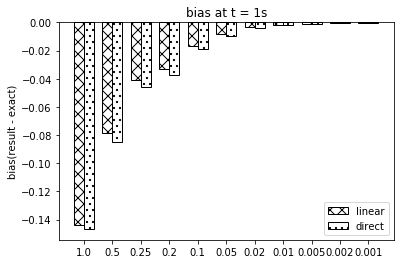

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
labels = delta_t
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, error_linear, width, label='linear',fill=False,hatch="xx")
rects2 = ax.bar(x + width/2, error_direct, width, label='direct',fill=False,hatch="..")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('bias(result - exact)')
ax.set_title('bias at t = 1s')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
plt.savefig("p2-t1.png")

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()

plt.show()